In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout

Using TensorFlow backend.


### Plotting for each Epoch and Loss

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## Normalize the data

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Vectorizing the Class Label to 10 Dimensions

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Defining some model parameters

In [11]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

# Model 1: --> 2 - Hidden Layers



## MLP + ReLU activation + ADAMOptimizer

In [12]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                23360     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 309,750
Trainable params: 309,750
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.2589 - acc: 0.9235 - val_loss: 0.1318 - val_acc: 0.9604
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1014

## Results:
1. Train Accuracy= 99.83%

## Plotting Each Epoch vs Loss

Test score: 0.09365907231679503
Test accuracy: 0.9805


<IPython.core.display.Javascript object>


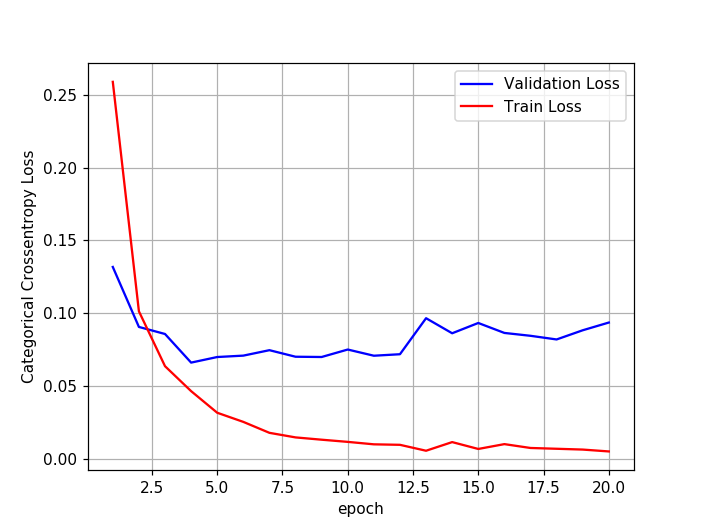

In [13]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [14]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2429 - acc: 0.9305 - val_loss: 0.1228 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0843 - acc: 0.9756 - val_loss: 0.0890 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0528 - acc: 0.9848 - val_loss: 0.0782 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0368 - acc: 0.9888 - val_loss: 0.0766 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0706 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0783 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0185 - acc: 0.9943 - val_loss: 0.0738 -

## Results:
1. Train Accuracy= 99.76%

## Plotting Each Epoch vs Loss

Test score: 0.08393578212396678
Test accuracy: 0.9793


<IPython.core.display.Javascript object>


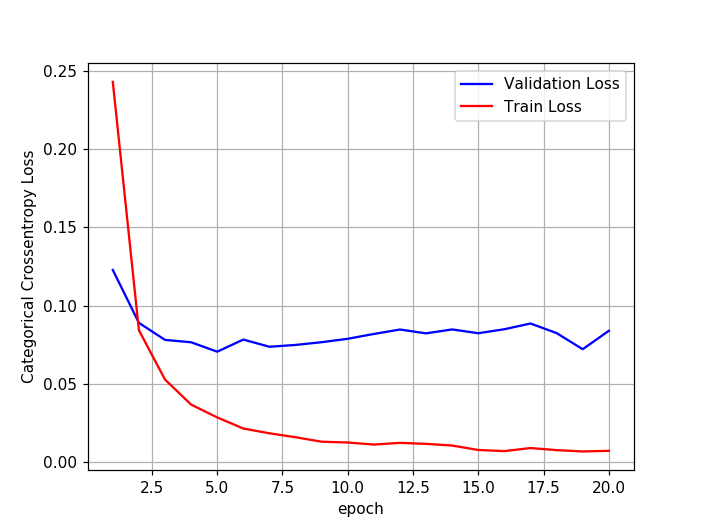

In [15]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##  MLP + Dropout(0.5) + AdamOptimizer

In [16]:
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.5970 - acc: 0.8187 - val_loss: 0.1836 - val_acc: 0.9441
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2818 - acc: 0.9191 - val_loss: 0.1288 - val_acc: 0.9602
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2140 - acc: 0.9375 - val_loss: 0.1104 - val_acc: 0.9664
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.1797 - acc: 0.9470 - val_loss: 0.0951 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.1577 - acc: 0.9539 - val_loss: 0.0871 - val_acc: 0.9734
Epoch 6/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.1435 - acc: 0.9582 - val_loss: 0.0786 - val_acc: 0.9757
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1327 - acc: 0.9611 - val_loss: 0.07

## Results:
1. Train Accuracy= 97.87%

## Plotting Each Epoch vs Loss

Test score: 0.06485723318307719
Test accuracy: 0.9811


<IPython.core.display.Javascript object>


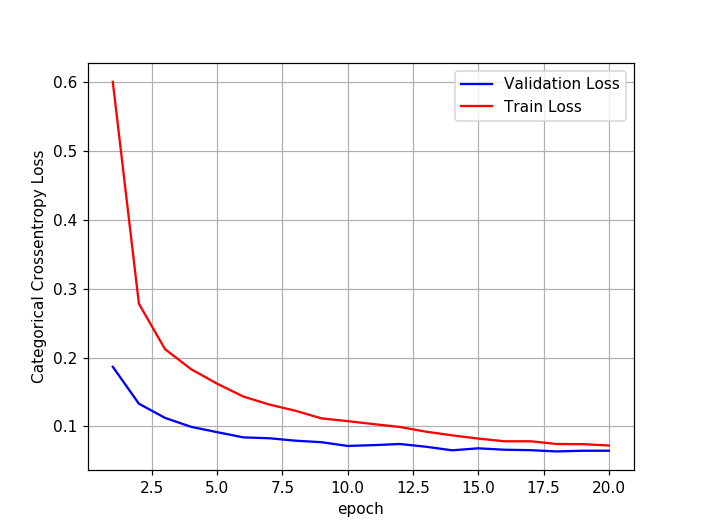

In [17]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##  MLP + Dropout(0.1) + AdamOptimizer

In [12]:
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.2750 - acc: 0.9192 - val_loss: 0.1166 - val_acc: 0.9655
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.1118 - acc: 0.9666 - val_loss: 0.0909 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0768 - acc: 0.9770 - val_loss: 0.0804 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0585 - acc: 0.9817 - val_loss: 0.0731 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0458 - acc: 0.9856 - val_loss: 0.0739 - val_acc: 0.9775
Epoch 6/20
60000/60000 [

## Results:
1. Train Accuracy= 99.57%

## Plotting each Epoch vs Loss

Test score: 0.06910191163946729
Test accuracy: 0.983


<IPython.core.display.Javascript object>


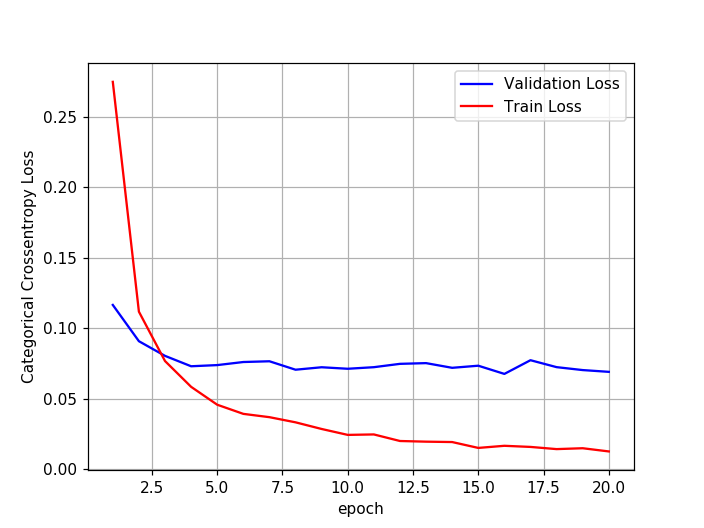

In [13]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + Dropout (0.7)+ AdamOptimizer

In [14]:
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 1.0427 - acc: 0.6779 - val_loss: 0.2808 - val_acc: 0.9202
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.5151 - acc: 0.8481 - val_loss: 0.2065 - val_acc: 0.9393
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.4049 - acc: 0.8848 - val_loss: 0.1728 - val_acc: 0.9478
Epoch 4/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.3492 - acc: 0.9026 - val_loss: 0.1515 - val_acc: 0.9528
Epoch 5/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.3088 - acc: 0.9136 - val_loss: 0.1388 - val_acc: 0.9590
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.2811 - acc: 0.9212 - val_loss: 0.1274 - val_acc: 0.9623
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2594 - acc: 0.9278 - val_loss: 0.1134 -

## Results:
1. Train Accuracy= 95.58%

# Plotting each Epoch vs Loss

Test score: 0.08424389982710127
Test accuracy: 0.975


<IPython.core.display.Javascript object>


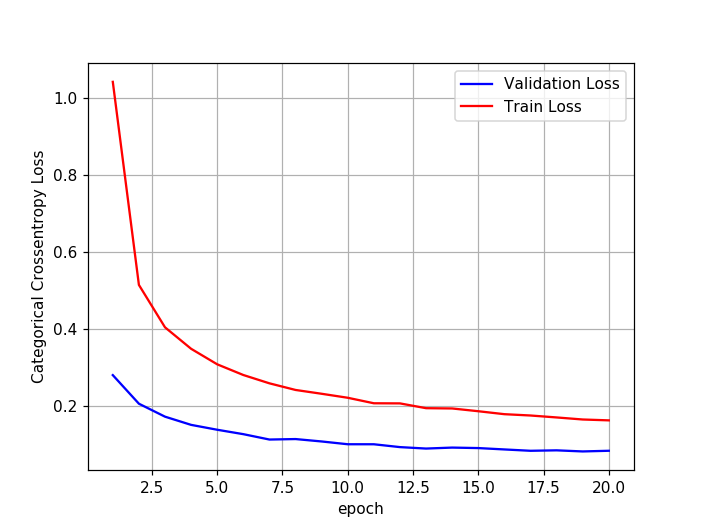

In [15]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 2:----> 3 Hidden Layers

## MLP + ReLU activation + ADAMOptimizer

In [18]:
model_relu = Sequential()

model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(70, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2564 - acc: 0.9242 - val_loss: 0.1124 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0908 - acc: 0.9725 - val_loss: 0.0857 - val_acc: 0.9744
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0595 - acc: 0.9815 - val_loss: 0.0762 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0429 - acc: 0.9862 - val_loss: 0.0689 - val_acc: 0.9788
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0328 - acc: 0.9891 - val_loss: 0.0709 - val_acc: 0.9775
Epoch 6/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0690 - val_acc: 0.9805
Epoch 7/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0825 - 

## Results: 
1. Train Accuracy= 99.72%

## Plotting each Epoch vs Loss

Test score: 0.10209789935903654
Test accuracy: 0.9799


<IPython.core.display.Javascript object>


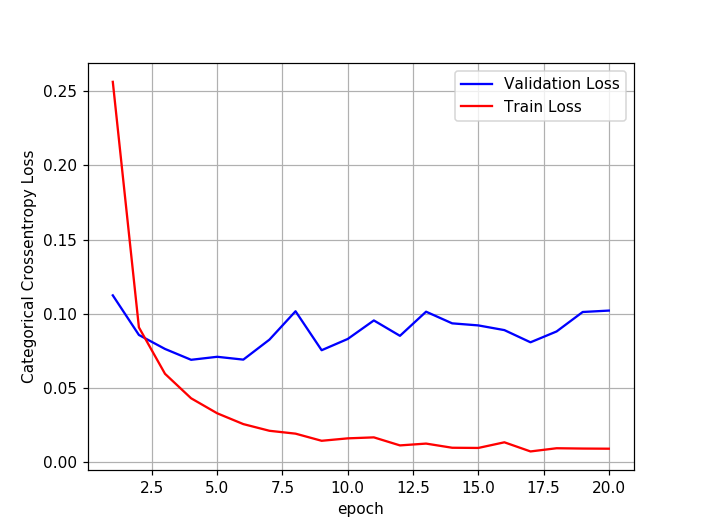

In [19]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [20]:
model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(70, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.2211 - acc: 0.9350 - val_loss: 0.1058 - val_acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0809 - acc: 0.9756 - val_loss: 0.0890 - val_acc: 0.9733
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0513 - acc: 0.9839 - val_loss: 0.0836 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0404 - acc: 0.9868 - val_loss: 0.0796 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0324 - acc: 0.9899 - val_loss: 0.0864 - val_acc: 0.9746
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0832 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0205 - acc: 0.9931 - val_loss: 0.0716 

## Results:
1. Train Accuracy: 99.74%

## Plotting each Epoch vs Loss

Test score: 0.07912658260073877
Test accuracy: 0.9801


<IPython.core.display.Javascript object>


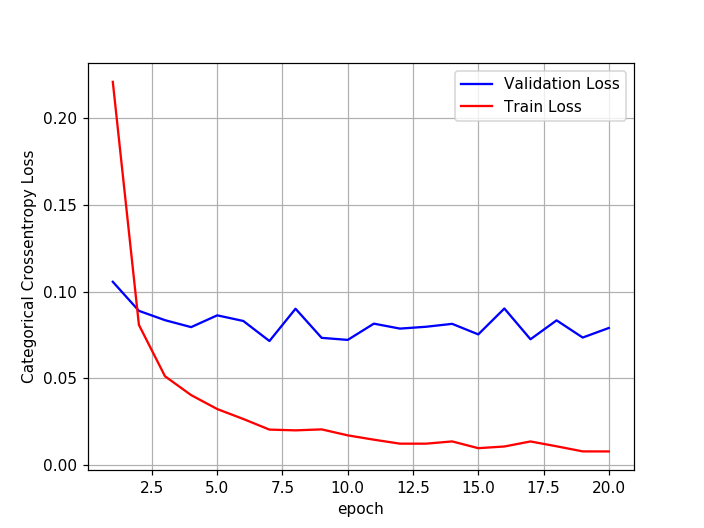

In [21]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Dropout (0.5)+ AdamOptimizer

In [22]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(70, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.7288 - acc: 0.7770 - val_loss: 0.1964 - val_acc: 0.9408
Epoch 2/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.3055 - acc: 0.9129 - val_loss: 0.1416 - val_acc: 0.9572
Epoch 3/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.2356 - acc: 0.9340 - val_loss: 0.1102 - val_acc: 0.9683
Epoch 4/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1935 - acc: 0.9450 - val_loss: 0.1066 - val_acc: 0.9698
Epoch 5/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1763 - acc: 0.9503 - val_loss: 0.0935 - val_acc: 0.9721
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1553 - acc: 0.9563 - val_loss: 0.0905 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.1476 - acc: 0.9584 - val_loss: 0.

## Results: 
1. Train Accuracy = 97.65% 

## Plotting each Epoch vs Loss

Test score: 0.06665783619710709
Test accuracy: 0.9809


<IPython.core.display.Javascript object>


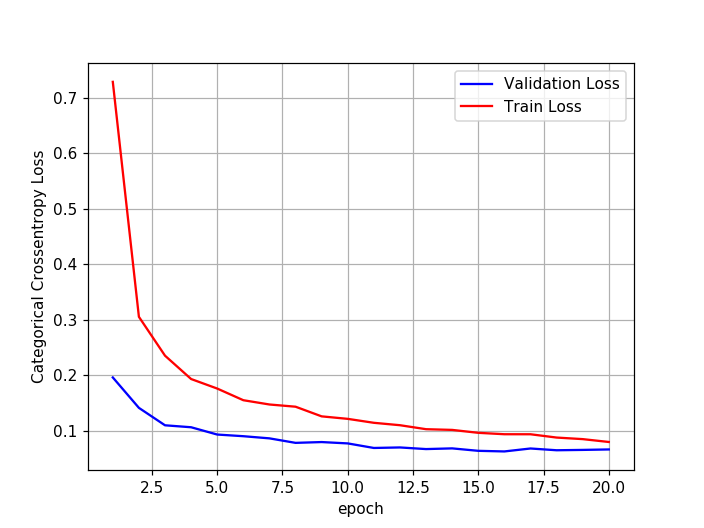

In [23]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + Dropout(0.1) + AdamOptimizer

In [17]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(70, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.2738 - acc: 0.9181 - val_loss: 0.1113 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.1145 - acc: 0.9649 - val_loss: 0.0873 - val_acc: 0.9733
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0809 - acc: 0.9747 - val_loss: 0.0866 - val_acc: 0.9725
Epoch 4/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0647 - acc: 0.9798 - val_loss: 0.0715 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0538 - acc: 0.9831 - val_loss: 0.0697 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0470 - acc: 0.9846 - val_loss: 0.0646 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0408 - acc: 0.9871 - val_loss: 0.

## Results:
1. Accuracy= 99.43%

## Plotting each Epoch vs Loss

Test score: 0.06381631516393027
Test accuracy: 0.9837


<IPython.core.display.Javascript object>


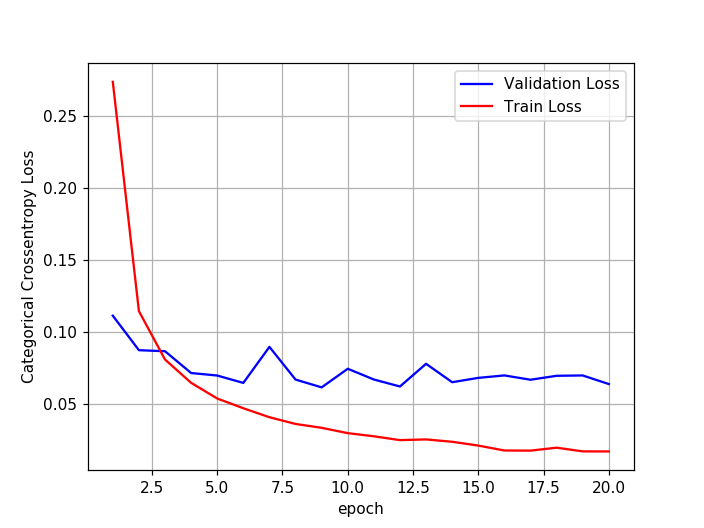

In [18]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + Dropout(0.7) + AdamOptimizer

In [19]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(150, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(70, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 214us/step - loss: 1.5645 - acc: 0.5105 - val_loss: 0.4003 - val_acc: 0.9014
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.6860 - acc: 0.7904 - val_loss: 0.2483 - val_acc: 0.9290
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.5067 - acc: 0.8556 - val_loss: 0.1941 - val_acc: 0.9427
Epoch 4/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.4291 - acc: 0.8845 - val_loss: 0.1741 - val_acc: 0.9496
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.3767 - acc: 0.8991 - val_loss: 0.1557 - val_acc: 0.9545
Epoch 6/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.3392 - acc: 0.9112 - val_loss: 0.1447 - val_acc: 0.9592
Epoch 7/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.3086 - acc: 0.9199 - val_loss: 0.

# Plotting each Epoch vs Loss

Test score: 0.091905259068124
Test accuracy: 0.9748


<IPython.core.display.Javascript object>


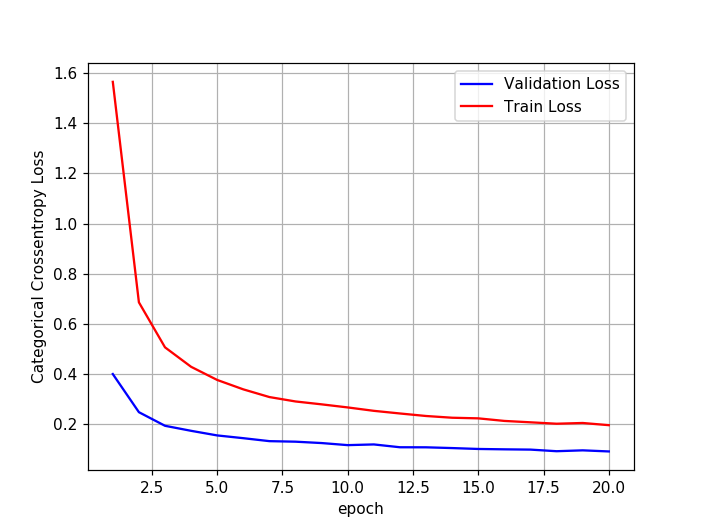

In [20]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model 3:----> 5 Hidden Layers

## MLP + ReLU activation + ADAMOptimizer

In [24]:
model_relu = Sequential()

model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(350, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(145, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.2215 - acc: 0.9331 - val_loss: 0.1031 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0883 - acc: 0.9730 - val_loss: 0.0971 - val_acc: 0.9702
Epoch 3/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0622 - acc: 0.9802 - val_loss: 0.0762 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0462 - acc: 0.9850 - val_loss: 0.1113 - val_acc: 0.9670
Epoch 5/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0800 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.0302 - acc: 0.9904 - val_loss: 0.0881 - val_acc: 0.9769
Epoch 7/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.0286 - acc: 0.9909 - val_loss: 0.

## Results:
1. Train Accuracy= 99.72%

## Plotting each Epoch vs Loss

Test score: 0.07591210639261503
Test accuracy: 0.9842


<IPython.core.display.Javascript object>


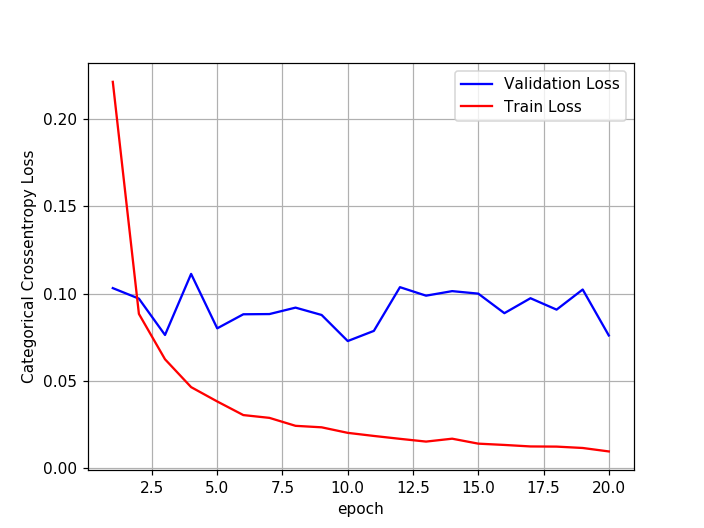

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [26]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(350, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(145, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.2161 - acc: 0.9365 - val_loss: 0.1082 - val_acc: 0.9670
Epoch 2/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.0830 - acc: 0.9746 - val_loss: 0.0832 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0602 - acc: 0.9808 - val_loss: 0.0904 - val_acc: 0.9730
Epoch 4/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0494 - acc: 0.9839 - val_loss: 0.0814 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0389 - acc: 0.9874 - val_loss: 0.1550 - val_acc: 0.9535
Epoch 6/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0358 - acc: 0.9883 - val_loss: 0.0828 - val_acc: 0.9757
Epoch 7/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0296 - acc: 0.9903 - val_loss: 0.

## Results: 
1. Train Accuracy= 99.61%

## Plotting each Epoch vs Loss

Test score: 0.07999502164848526
Test accuracy: 0.9808


<IPython.core.display.Javascript object>


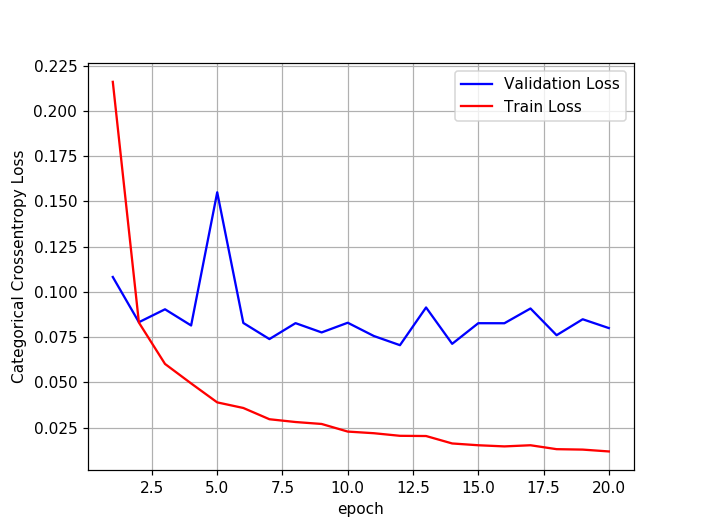

In [27]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Dropout (0.5)+ AdamOptimizer

In [28]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5)) 

model_drop.add(Dense(350, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(145, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 385us/step - loss: 1.1365 - acc: 0.6434 - val_loss: 0.2582 - val_acc: 0.9255
Epoch 2/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.3932 - acc: 0.8887 - val_loss: 0.1707 - val_acc: 0.9523
Epoch 3/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.2857 - acc: 0.9224 - val_loss: 0.1386 - val_acc: 0.9625
Epoch 4/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.2380 - acc: 0.9370 - val_loss: 0.1252 - val_acc: 0.9647
Epoch 5/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.2131 - acc: 0.9448 - val_loss: 0.1101 - val_acc: 0.9711
Epoch 6/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.1929 - acc: 0.9496 - val_loss: 0.1078 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.1778 - acc: 0.9538 - val_loss: 0.

## Results:
 1. Train Accuracy= 97.51%

## Plotting each Epoch vs Loss

Test score: 0.0708962796379812
Test accuracy: 0.9824


<IPython.core.display.Javascript object>


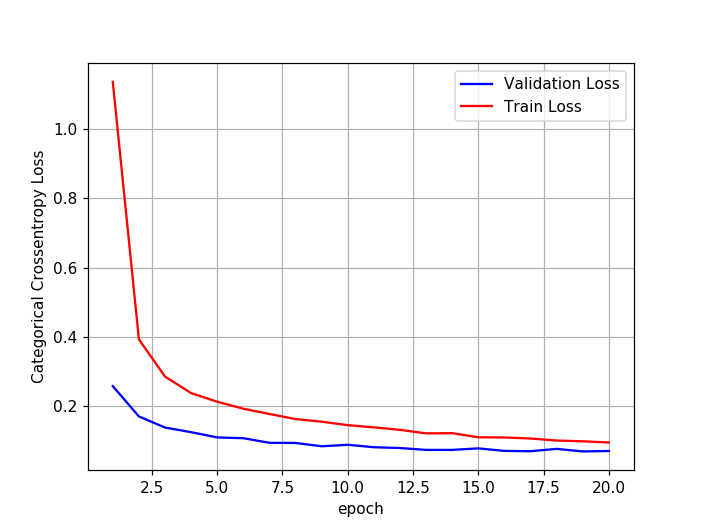

In [29]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Dropout (0.1)+ AdamOptimizer

In [21]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1)) 

model_drop.add(Dense(350, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(145, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 404us/step - loss: 0.2872 - acc: 0.9145 - val_loss: 0.1030 - val_acc: 0.9681
Epoch 2/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.1203 - acc: 0.9640 - val_loss: 0.1022 - val_acc: 0.9692
Epoch 3/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.0906 - acc: 0.9723 - val_loss: 0.0835 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0722 - acc: 0.9779 - val_loss: 0.0843 - val_acc: 0.9752
Epoch 5/20
60000/60000 [==============================] - 21s 346us/step - loss: 0.0620 - acc: 0.9806 - val_loss: 0.0723 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 20s 325us/step - loss: 0.0549 - acc: 0.9826 - val_loss: 0.0737 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.0494 - acc: 0.9845 - val_loss: 0.

## Plotting each Epoch vs Loss 

Test score: 0.06661306326177437
Test accuracy: 0.9837


<IPython.core.display.Javascript object>


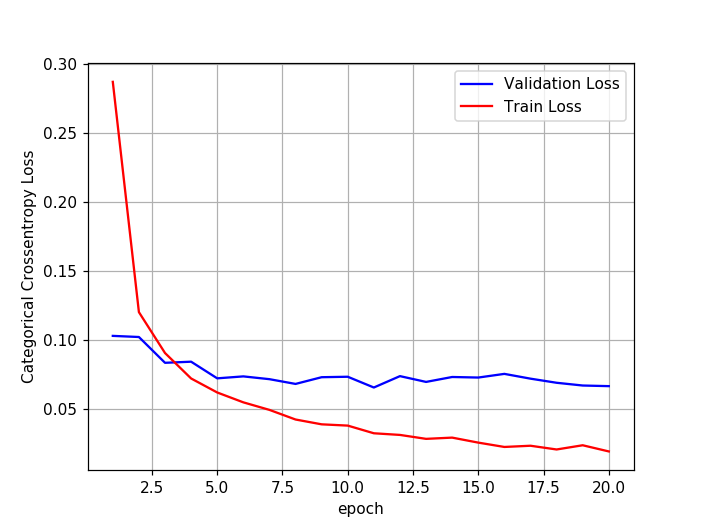

In [22]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Dropout (0.7)+ AdamOptimizer

In [23]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7)) 

model_drop.add(Dense(350, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(230, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(145, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 413us/step - loss: 2.4775 - acc: 0.2108 - val_loss: 1.6731 - val_acc: 0.3405
Epoch 2/20
60000/60000 [==============================] - 21s 348us/step - loss: 1.4687 - acc: 0.4547 - val_loss: 0.8386 - val_acc: 0.7370
Epoch 3/20
60000/60000 [==============================] - 21s 347us/step - loss: 1.0088 - acc: 0.6378 - val_loss: 0.5046 - val_acc: 0.8555
Epoch 4/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.7767 - acc: 0.7416 - val_loss: 0.3513 - val_acc: 0.9134
Epoch 5/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.6363 - acc: 0.8077 - val_loss: 0.2584 - val_acc: 0.9343
Epoch 6/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.5368 - acc: 0.8471 - val_loss: 0.2157 - val_acc: 0.9464
Epoch 7/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.4730 - acc: 0.8754 - val_loss: 0.

## Plotting each Epoch vs Loss

Test score: 0.10832664410285651
Test accuracy: 0.975


<IPython.core.display.Javascript object>


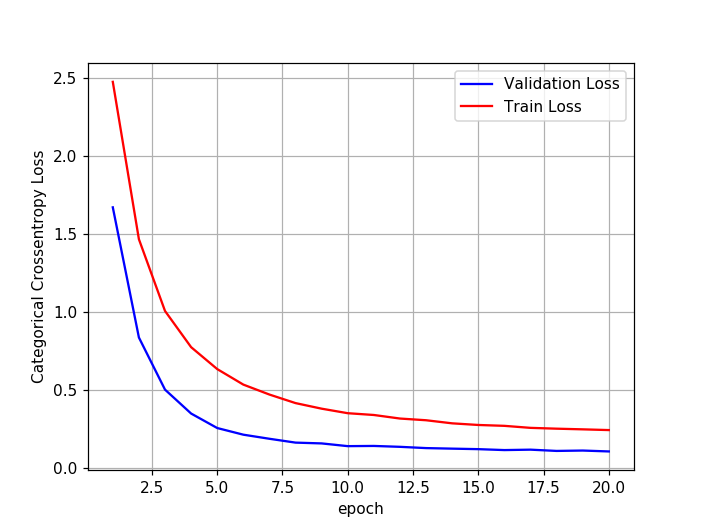

In [24]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Pretty Table

In [25]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["No. of Hidden Layers Used", "Activation Unit","Optimiser", "Batch Normalisation", "DropOuts"," Train Accuracy","Test_Accuracy"]

x.add_row(["2", "ReLU","Adam","No","No" ,"99.83%", "98.05%"])
x.add_row(["2", "ReLU","Adam","Yes","No" ,"99.76%", "97.93%"])
x.add_row(["2", "ReLU","Adam","Yes","0.5" ,"97.87%", "98.11%"])
x.add_row(["2", "ReLU","Adam","Yes","0.1" ,"99.57%", "98.3%"])
x.add_row(["2", "ReLU","Adam","Yes","0.7" ,"95.58%", "97.5%"])

x.add_row(["3", "ReLU","Adam","No","No", "99.72%", "97.99%"])
x.add_row(["3", "ReLU","Adam","Yes","No" ,"99.74%", "98.01%"])
x.add_row(["3", "ReLU","Adam","Yes","0.5","97.65%", "98.09%"])
x.add_row(["2", "ReLU","Adam","Yes","0.1" ,"99.43%", "98.37%"])
x.add_row(["2", "ReLU","Adam","Yes","0.7" ,"94.94%", "97.48%"])

x.add_row(["5", "ReLU","Adam","No","No" ,"99.72%", "98.42%"])
x.add_row(["5", "ReLU","Adam","Yes","No" ,"99.61%", "98.08%"])
x.add_row(["5", "ReLU","Adam","Yes","0.5" ,"97.51%", "98.24%"])
x.add_row(["2", "ReLU","Adam","Yes","0.1" ,"99.4%", "98.37%"])
x.add_row(["2", "ReLU","Adam","Yes","0.7" ,"94.44%", "97.5%"])


print(x)

+---------------------------+-----------------+-----------+---------------------+----------+-----------------+---------------+
| No. of Hidden Layers Used | Activation Unit | Optimiser | Batch Normalisation | DropOuts |  Train Accuracy | Test_Accuracy |
+---------------------------+-----------------+-----------+---------------------+----------+-----------------+---------------+
|             2             |       ReLU      |    Adam   |          No         |    No    |      99.83%     |     98.05%    |
|             2             |       ReLU      |    Adam   |         Yes         |    No    |      99.76%     |     97.93%    |
|             2             |       ReLU      |    Adam   |         Yes         |   0.5    |      97.87%     |     98.11%    |
|             2             |       ReLU      |    Adam   |         Yes         |   0.1    |      99.57%     |     98.3%     |
|             2             |       ReLU      |    Adam   |         Yes         |   0.7    |      95.58%     | 

# Conclusion: 

1. We can see that using Batch Normalization and DropOuts gave better Accuracy.
2. Batch Normalization helps in Faster Convergence , since it prevents Internal Covariance Shift
3. We are further avoiding Overfitting by using randomisation as Regularisation i.e. DROPOUTS.
4. The best results are seen while using Batch Normalisation and Dropouts together. 
   
__ DropOut Rates__
1. In Model 1: Dropout=0.5 , it converged well
               Dropout=0.1 , didn't converge well, Overfitted
               DropOut=0.7 , converged but not better than Dropout=0.5

1. In Model 2: Dropout=0.5 , it converged well
               Dropout=0.1 , didn't converge well, Overfitted
               DropOut=0.7 , converged but not better than Dropout=0.5
               
1. In Model 3: Dropout=0.5 , it converged well
               Dropout=0.1 , didn't converge well, Overfitted
               DropOut=0.7 , converged but not better than Dropout=0.5

__Model 3 gave a better results than Model 2 followed by Model 1  ,  in terms of Accuracy and Loss vs Epoch Curves__            